In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import regex as re

In [2]:
#import data from csv file
df = pd.read_csv('datascientist-test-data.csv')
df.head()

,event_user,install_date,event_name,event_time,slotmachine_id,current_level,session_id,session_token,total_bet_amount,max_bet_amount,amount,spin_type,win_type
0,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,2500,5000,750,manual,fake
1,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,72000,manual,mega
2,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,0,manual,none
3,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,1500,manual,fake
4,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:47:34.000000,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,12500,0,manual,none


In [3]:
#returns statistical description of the data in the DataFrame
df.describe()

,current_level,total_bet_amount,max_bet_amount,amount
count,842765.000000,8.427650e+05,8.427650e+05,8.427650e+05
mean,74.636359,1.835173e+08,2.547513e+08,1.916436e+08
std,268.752350,1.146965e+09,1.194966e+09,9.442484e+09
min,1.000000,4.000000e+02,5.000000e+03,0.000000e+00
25%,10.000000,1.250000e+04,2.500000e+05,0.000000e+00
50%,20.000000,5.600000e+04,7.500000e+05,0.000000e+00
75%,30.000000,2.500000e+05,3.000000e+06,3.000000e+04
max,1562.000000,8.000000e+09,8.000000e+09,5.265440e+12


In [4]:
# to get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842765 entries, 0 to 842764
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   event_user        842765 non-null  object
 1   install_date      842765 non-null  object
 2   event_name        842765 non-null  object
 3   event_time        842765 non-null  object
 4   slotmachine_id    842765 non-null  object
 5   current_level     842765 non-null  int64 
 6   session_id        842765 non-null  object
 7   session_token     842765 non-null  object
 8   total_bet_amount  842765 non-null  int64 
 9   max_bet_amount    842765 non-null  int64 
 10  amount            842765 non-null  int64 
 11  spin_type         842765 non-null  object
 12  win_type          842765 non-null  object
dtypes: int64(4), object(9)
memory usage: 83.6+ MB


In [5]:
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object
df['install_date'] = pd.to_datetime(df['install_date'])
df['event_time'] = pd.to_datetime(df['event_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842765 entries, 0 to 842764
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_user        842765 non-null  object        
 1   install_date      842765 non-null  datetime64[ns]
 2   event_name        842765 non-null  object        
 3   event_time        842765 non-null  datetime64[ns]
 4   slotmachine_id    842765 non-null  object        
 5   current_level     842765 non-null  int64         
 6   session_id        842765 non-null  object        
 7   session_token     842765 non-null  object        
 8   total_bet_amount  842765 non-null  int64         
 9   max_bet_amount    842765 non-null  int64         
 10  amount            842765 non-null  int64         
 11  spin_type         842765 non-null  object        
 12  win_type          842765 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 83.

In [6]:
#returns the first five rows of the DataFrame.
df.head()

,event_user,install_date,event_name,event_time,slotmachine_id,current_level,session_id,session_token,total_bet_amount,max_bet_amount,amount,spin_type,win_type
0,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,2500,5000,750,manual,fake
1,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,72000,manual,mega
2,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,0,manual,none
3,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,1500,manual,fake
4,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:47:34,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,12500,0,manual,none


In [7]:
#evaluating the data if there are missing values.
df.isna().sum()

event_user          0
install_date        0
event_name          0
event_time          0
slotmachine_id      0
current_level       0
session_id          0
session_token       0
total_bet_amount    0
max_bet_amount      0
amount              0
spin_type           0
win_type            0
dtype: int64

## How many rows and columns are there in the data?

In [8]:
#returns the dimension of the DataFrame
df.shape
print("\nThere are {:,} columns and {:,} rows in the data.\n".format(df.shape[1],df.shape[0]))


There are 13 columns and 842,765 rows in the data.



## How many unique players exist in the data?

In [9]:
#returns the length of the value_counts() of the dataframe
len_user = len(df['event_user'].value_counts())
print("\nThere are {:,} unique players exist in the data.\n".format(len_user))


There are 1,275 unique players exist in the data.



## How many unique game sessions exist in the data?

In [10]:
#returns the length of the value_counts() of the dataframe
len_session = len(df['session_id'].value_counts())
print("\nThere are {:,} unique game sessions exist in the data.\n".format(len_session))


There are 5,377 unique game sessions exist in the data.



## How many unique slot machine sessions exist in the data?

In [11]:
#returns the length of the value_counts() of the dataframe
len_token = len(df['session_token'].value_counts())
print("\nThere are {:,} unique slot machine sessions exist in the data.\n".format(len_token))


There are 7,837 unique slot machine sessions exist in the data.



## How many unique slot machines exist in the data?

In [12]:
len_machine = len(df['slotmachine_id'].value_counts())
print("\nThere are {:,} unique slot machines exist in the data.\n".format(len_machine))


There are 49 unique slot machines exist in the data.



In [13]:
#returns a columns with duration between df['event_time'] and df['install_date'] and converting each data to str
df['days'] = df['event_time'] - df['install_date']
df['days'] = [str(d) for d in df['days']]

#using regular expression to extract 'x days' from df['days'] and returning its values to df['days']
days = [re.findall(r"\d\sdays",d) for d in df['days']]
df['days'] = [d[0] for d in days]
df.head()

,event_user,install_date,event_name,event_time,slotmachine_id,current_level,session_id,session_token,total_bet_amount,max_bet_amount,amount,spin_type,win_type,days
0,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,2500,5000,750,manual,fake,0 days
1,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,72000,manual,mega,0 days
2,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,0,manual,none,0 days
3,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,1500,manual,fake,0 days
4,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:47:34,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,12500,0,manual,none,0 days


In [14]:
#returns a pivot table with a unique value of event_user in each days 
pivot_duration = pd.pivot_table(df,index=['days'],values=['event_user'], aggfunc=lambda x: len(x.unique()))
pivot_duration

,event_user
days,
0 days,1261
1 days,341
2 days,235
3 days,223
4 days,98


## What is the Day 0 to 3 Retention of the players? (What percentage of players who installed returned X days from install).

In [15]:
#using for loop to return the percentage of players who installed and returned x days from intall.
for i in range(len(pivot_duration)):
    percent = (pivot_duration['event_user'].values[i]/len(df['event_user'].value_counts()))*100
    print("\n{1:.2f}% of players who installed and returned {0} days from installation.".format(i, percent))


98.90% of players who installed and returned 0 days from installation.

26.75% of players who installed and returned 1 days from installation.

18.43% of players who installed and returned 2 days from installation.

17.49% of players who installed and returned 3 days from installation.

7.69% of players who installed and returned 4 days from installation.


In [16]:
#returns a pivot table with the number of counts of slotmachines in each session_id and event_user
pivot_slotmachine = pd.pivot_table(df,index=['event_user','session_id'], values=['slotmachine_id'], aggfunc='count')
pivot_slotmachine

slotmachine_id
event_user                       session_id                                      
0006eb6299ddd86c1f8f5d5c2c868a56 109c3ca6459b4dc9abb6eca10e4d71e8             129
                                 29cce4ff383b7540020363cb91d05424              55
                                 2e438c4036316f8b51aea8e8bfedaeb8             166
                                 31137855a6c83c04fddcfff9080612e8              59
                                 39dc99236594c5feedb56c6b91418b78             268
...                                                                           ...
ff6d908ce1e1e23eb077bbf187ea8621 dbe3b0ea808239460cf73902acef0fb6              25
ff6e2bfe18a818252d15613e914b561a 198f580c51095804051dd55b55ed6988              38
                                 bce486348c6f0ca814bfa9b339a0cc0a              33
                                 f6f1a582bad390d1cbd877015e9fdfec              99
ffd256da322ee33d0d9d34ff7416a4b0 63e5528e5744c289f3219d8d05b48a14               1

[5377 rows x 1 columns]

## What is the average number of slot machines a player plays in a session?

In [17]:
#returns the average, min, and max vnumber of slot machines a player plays in a session.
pivot_slotmachine_mean = np.mean(pivot_slotmachine.values)
pivot_slotmachine_values = pivot_slotmachine.values

print("\nThe average number of slot machines a player plays in a session is {:.0f}.".format(pivot_slotmachine_mean))
print("\nThe minimum number of slot machines a player plays in a sesssion is {}, while its maximum is {}.\n".format(pivot_slotmachine_values.min(), pivot_slotmachine_values.max()))


The average number of slot machines a player plays in a session is 157.

The minimum number of slot machines a player plays in a sesssion is 1, while its maximum is 5937.



In [18]:
#returns a pivot table with the number of counts of unique slotmachines in each session_id and event_user
pivot_unique_slotmachine = pd.pivot_table(df,index=['event_user','session_id'], values=['slotmachine_id'], aggfunc=lambda x: len(x.unique()))
pivot_unique_slotmachine

slotmachine_id
event_user                       session_id                                      
0006eb6299ddd86c1f8f5d5c2c868a56 109c3ca6459b4dc9abb6eca10e4d71e8               1
                                 29cce4ff383b7540020363cb91d05424               1
                                 2e438c4036316f8b51aea8e8bfedaeb8               1
                                 31137855a6c83c04fddcfff9080612e8               1
                                 39dc99236594c5feedb56c6b91418b78               1
...                                                                           ...
ff6d908ce1e1e23eb077bbf187ea8621 dbe3b0ea808239460cf73902acef0fb6               2
ff6e2bfe18a818252d15613e914b561a 198f580c51095804051dd55b55ed6988               1
                                 bce486348c6f0ca814bfa9b339a0cc0a               1
                                 f6f1a582bad390d1cbd877015e9fdfec               1
ffd256da322ee33d0d9d34ff7416a4b0 63e5528e5744c289f3219d8d05b48a14               1

[5377 rows x 1 columns]

## What is the average, min, and max number of unique slot machines a player plays in a session?

In [19]:
#returns the average, min, and max number of unique slot machines a player plays in a session.
pivot_unique_slotmachine_mean = np.mean(pivot_unique_slotmachine.values)
pivot_unique_slotmachine_values = pivot_unique_slotmachine.values

print("\nThe average number of unique slot machines a player plays in a session is {:.0f}.".format(pivot_unique_slotmachine_mean))
print("\nThe minimum number of unique slot machines a player plays in a sesssion is {:.0f}, while its maximum is {:.0f}.\n".format(pivot_unique_slotmachine_values.min(), pivot_unique_slotmachine_values.max()))


The average number of unique slot machines a player plays in a session is 2.

The minimum number of unique slot machines a player plays in a sesssion is 1, while its maximum is 12.



In [20]:
#returns a pivot table with the number of counts of spins in each session_token and slot machine.
pivot_spin = pd.pivot_table(df,index=['slotmachine_id','session_token'], values=['spin_type'], aggfunc='count')
pivot_spin

spin_type
slotmachine_id    session_token                              
AdventuresOfAlice 1de243a3d886f853c6a2e38c7f2037d3         15
                  492874d77c9e411ba87493ce454fd4cc        420
                  56865f0e9e9c74bd386317f6bb5a6238         41
ArcaneReels       07d3d8efd67b159ec0fcced9dbace2fa         78
                  15082f01a42462a9bf2e09f99fb3a1a1         22
...                                                       ...
goldennights      fd87d23d3b5979abfa4387f2d6d317be        184
                  fd88c9946f19945b7ffaa041e1637bf4        102
                  fe1fb28d07995fd6a42016cd9319b4a3         87
                  fe80c563d492b63dd2457210b1a65f7a         27
                  ffd247ea6e84688921cfb1a5921363c1        160

[7837 rows x 1 columns]

## What is the average, min, and max number of spins played in each machine session?

In [21]:
#returns the average, min, and max number of spins played in each machine session.
pivot_spin_mean = round(np.mean(pivot_spin.values))
pivot_spin_values = pivot_spin.values

print("\nThe average number of spins played in each machine session is {}.".format(pivot_spin_mean))
print("\nThe minimum number of spins played in each machine sesssion is {}, while its maximum is {:,}.\n".format(pivot_spin_values.min(), pivot_spin_values.max()))


The average number of spins played in each machine session is 108.

The minimum number of spins played in each machine sesssion is 1, while its maximum is 4,272.



In [22]:
#returns a pivot table with the number of counts of unique spin type in each session_token and slot machine
pivot_unique_spin = pd.pivot_table(df,index=['slotmachine_id','session_token'], values=['spin_type'], aggfunc=lambda x: len(x.unique()))
pivot_unique_spin

spin_type
slotmachine_id    session_token                              
AdventuresOfAlice 1de243a3d886f853c6a2e38c7f2037d3          1
                  492874d77c9e411ba87493ce454fd4cc          2
                  56865f0e9e9c74bd386317f6bb5a6238          1
ArcaneReels       07d3d8efd67b159ec0fcced9dbace2fa          3
                  15082f01a42462a9bf2e09f99fb3a1a1          1
...                                                       ...
goldennights      fd87d23d3b5979abfa4387f2d6d317be          4
                  fd88c9946f19945b7ffaa041e1637bf4          3
                  fe1fb28d07995fd6a42016cd9319b4a3          3
                  fe80c563d492b63dd2457210b1a65f7a          3
                  ffd247ea6e84688921cfb1a5921363c1          3

[7837 rows x 1 columns]

## What is the average, min, and max number of unique spins played in each machine session?

In [23]:
#returns the average, min, and max number of unique spin type played in each machine session.
pivot_unique_spin_mean = round(np.mean(pivot_unique_spin.values))
pivot_unique_spin_values = pivot_unique_spin.values

print("\nThe average number of unique spins played in each machine session is {}.".format(pivot_unique_spin_mean))
print("\nThe minimum number of unique spins played in each machine sesssion is {}, while its maximum is {}.\n".format(pivot_spin_values.min(), pivot_unique_spin_values.max()))


The average number of unique spins played in each machine session is 2.

The minimum number of unique spins played in each machine sesssion is 1, while its maximum is 4.



In [24]:
#returns a pivot table with total amount and bet amount, RTP, loss, win_rate, RTP_rank, loss_rank, winrate_rank of each slot machines
pivot_rtp = pd.pivot_table(df,index=['slotmachine_id'], values=['total_bet_amount', 'amount'], aggfunc='sum')
pivot_rtp['RTP'] = pivot_rtp['amount'] / pivot_rtp['total_bet_amount']
pivot_rtp['loss'] =  pivot_rtp['amount'] - pivot_rtp['total_bet_amount']
pivot_rtp['win_rate'] = (df[df['amount']!=0].groupby('slotmachine_id')['win_type'].count() / df.groupby('slotmachine_id')['win_type'].count())*100

pivot_rtp['RTP_rank'] = pivot_rtp['RTP'].rank(ascending=False)
pivot_rtp['loss_rank'] = pivot_rtp['loss'].rank(ascending=False)
pivot_rtp['winrate_rank'] = pivot_rtp['win_rate'].rank(ascending=False)

pivot_rtp

,amount,total_bet_amount,RTP,loss,win_rate,RTP_rank,loss_rank,winrate_rank
slotmachine_id,,,,,,,,
AdventuresOfAlice,10069299999,10715025000,0.939736,-645725001,51.050420,15.0,24.0,14.0
ArcaneReels,344844323100,473064574000,0.728958,-128220250900,51.192369,33.0,44.0,12.0
AstroBlitz,84264357350,185911140000,0.453251,-101646782650,41.329954,46.0,42.0,33.0
BigBucksBarbeque,3293555544000,3907004450000,0.842987,-613448906000,70.883882,25.0,47.0,1.0
BigWinBuffalo,1614281913700,701800418000,2.300201,912481495700,49.512642,9.0,9.0,16.0
BubbleCubes,196525550,285988500,0.687180,-89462950,49.381443,38.0,16.0,17.0
CasinoCats,6686013230,10096228000,0.662229,-3410214770,39.948155,40.0,31.0,36.0
CasinoClassicSevens,590000000000,1600000000,368.750000,588400000000,25.000000,1.0,10.0,48.0
Cleopatra,2869973097600,1846872662500,1.553964,1023100435100,41.329410,11.0,8.0,34.0


## What is the average RTP (Return to Player) for each slot machine?

In [25]:
#returns the average RTP value for each slot machine.
pivot_rtp_mean = pivot_rtp['RTP'].mean()
print("\nThe average RTP value for each slot machine is {:.2f}.\n".format(pivot_rtp_mean))


The average RTP value for each slot machine is 13.07.



## Which slot machine has the closes RTP value to the average RTP value?

In [26]:
#returns a slot machine and its RTP value
low = pivot_rtp['RTP'].mean() * 0.90
high = pivot_rtp['RTP'].mean() * 1.10
mask = pivot_rtp['RTP'].between(low, high)
pivot_rtp_near_mean = pivot_rtp[mask].index[0]
pivot_rtp_near_mean_value = pivot_rtp['RTP'][pivot_rtp.index.to_list().index(pivot_rtp[mask].index[0])]

print("\n{} has an RTP value of {:.2f} which is near to the average RTP value for each slot machine.\n".format(pivot_rtp_near_mean, pivot_rtp_near_mean_value))


FarmCubes has an RTP value of 13.86 which is near to the average RTP value for each slot machine.



## What is the maximum and minimum RTP(Return to Player) for each slot machine?

In [27]:
high_rtp = pivot_rtp.sort_values('RTP',ascending=False).index[0]
low_rtp = pivot_rtp.sort_values('RTP',ascending=True).index[0]

pivot_rtp_values = pivot_rtp['RTP']
print("\n{} has the minimum RTP value of {:.2f}, while {} has maximum RTP value of {:.2f}.\n".format(low_rtp, pivot_rtp_values.min(), high_rtp,pivot_rtp_values.max()))


LuckyClassic777 has the minimum RTP value of 0.24, while CasinoClassicSevens has maximum RTP value of 368.75.



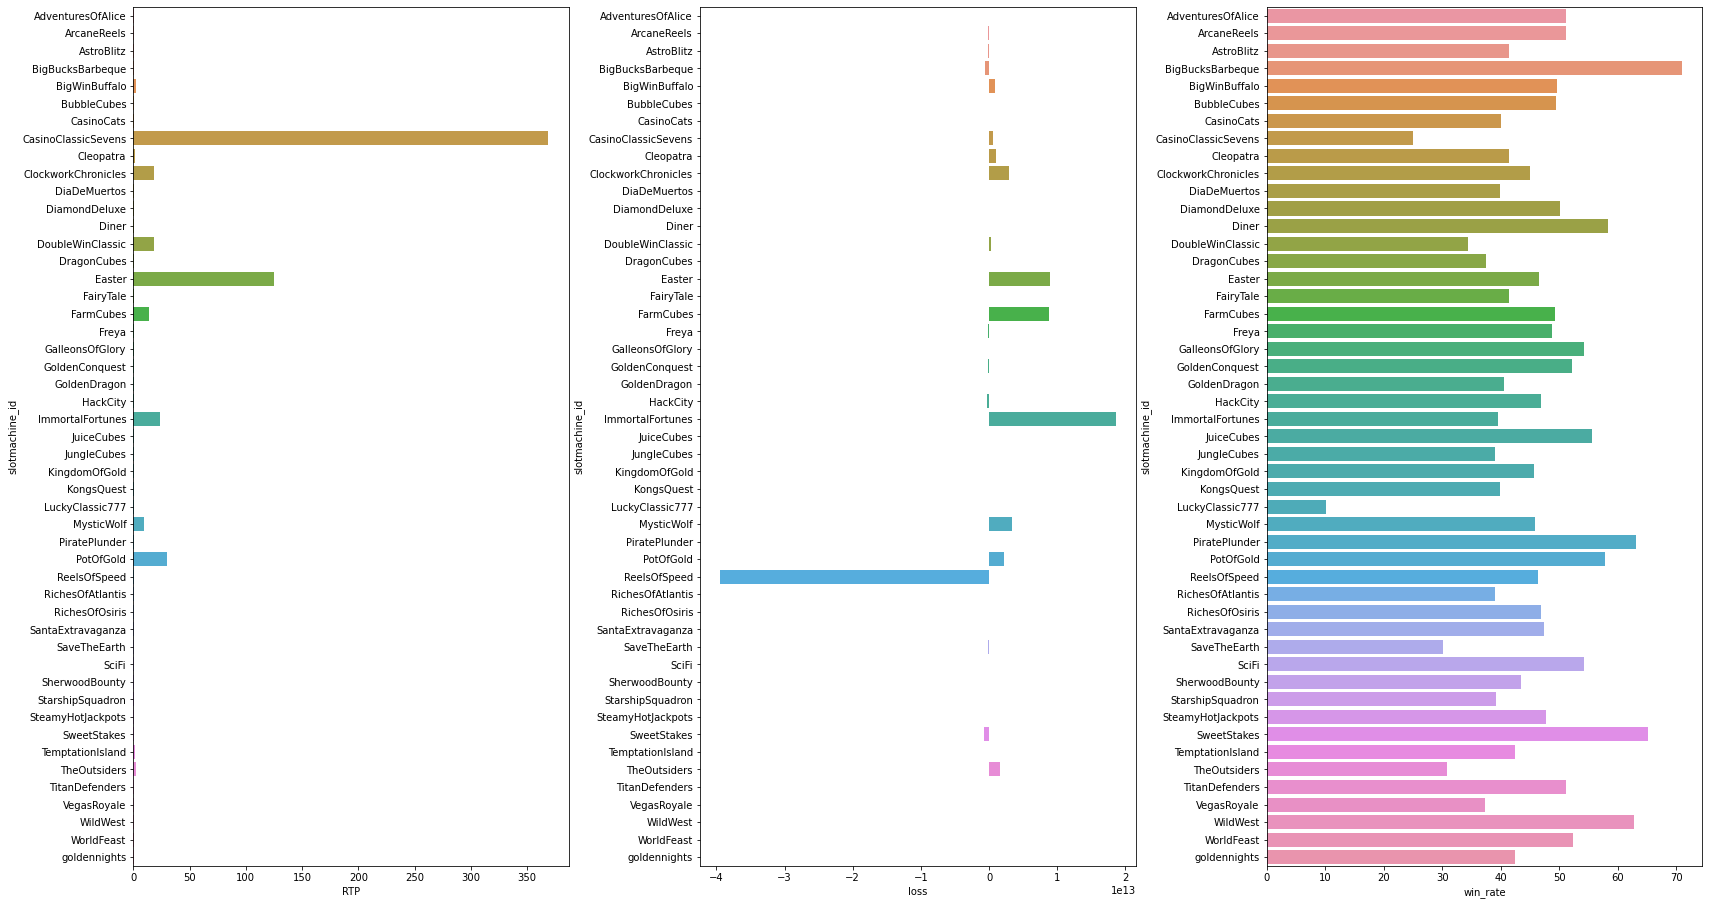

In [28]:
# returns a 1 by 3 barplot of RTP, Loss, and win_rate of each slot machine
fig, ax = plt.subplots(1,3, figsize=(25,15),sharey=False)
fig.tight_layout(pad = 10.0)
pivot_rtp_sort = pivot_rtp['RTP']
pivot_rtp_loss = pivot_rtp['loss']
pivot_rtp_win = pivot_rtp['win_rate']
sns.barplot(ax=ax[0], x=pivot_rtp_sort, y=pivot_rtp_sort.index,orient='h')
sns.barplot(ax=ax[1], x=pivot_rtp_loss, y=pivot_rtp_loss.index,orient='h')
sns.barplot(ax=ax[2], x=pivot_rtp_win, y=pivot_rtp_win.index,orient='h');

## Find the slot machines with the highest value of RTP, loss, and win rate.

In [29]:
#returns the highest RTP value of the slot machine and its loss, win_rate, loss_rank, and winrate_rank.
highrtp_slot = pivot_rtp.sort_values('RTP',ascending=False).index[0]
highrtp_value = pivot_rtp.sort_values('RTP',ascending=False)['RTP'][0]
highrtp_loss = pivot_rtp.sort_values('RTP',ascending=False)['loss'][0]
highrtp_lossrank = pivot_rtp.sort_values('RTP',ascending=False)['loss_rank'][0]
highrtp_win = pivot_rtp.sort_values('RTP',ascending=False)['win_rate'][0]
highrtp_winrank = pivot_rtp.sort_values('RTP',ascending=False)['winrate_rank'][0]

#returns the highest loss value of the slot machine and its RTP, win_rate, RTP_rank, and winrate_rank.
highloss_slot = pivot_rtp.sort_values('loss',ascending=False).index[0]
highloss_value = pivot_rtp.sort_values('loss',ascending=False)['RTP'][0]
highloss_valuerank = pivot_rtp.sort_values('loss',ascending=False)['RTP_rank'][0]
highloss_loss = pivot_rtp.sort_values('loss',ascending=False)['loss'][0]
highloss_win = pivot_rtp.sort_values('loss',ascending=False)['win_rate'][0]
highloss_winrank = pivot_rtp.sort_values('loss',ascending=False)['winrate_rank'][0]

#returns the highest win_rate value of the slot machine and its RTP, loss, RTP_rank, and loss_rank.
highwin_slot = pivot_rtp.sort_values('win_rate',ascending=False).index[0]
highwin_value = pivot_rtp.sort_values('win_rate',ascending=False)['RTP'][0]
highwin_valuerank = pivot_rtp.sort_values('win_rate',ascending=False)['RTP_rank'][0]
highwin_loss = pivot_rtp.sort_values('win_rate',ascending=False)['loss'][0]
highwin_lossrank = pivot_rtp.sort_values('win_rate',ascending=False)['loss_rank'][0]
highwin_win = pivot_rtp.sort_values('win_rate',ascending=False)['win_rate'][0]


print("\n{} has the highest RTP with a value of {:.2f} and with a loss amount of {:,} which ranks {:.0f}th and a win rate of {:.2f}% which ranks {:.0f}th.".format(highrtp_slot,highrtp_value,highrtp_loss,highrtp_lossrank,highrtp_win,highrtp_winrank))
print("\n{} has the highest loss with a value of {:,} and with an RTP of {:.2f} which ranks {:.0f}th and a win rate of {:.2f}% which ranks {:0.0f}th.".format(highloss_slot,highloss_loss,highloss_value,highloss_valuerank,highloss_win,highloss_winrank))
print("\n{} has the highest win rate with a value of {:.2f}% and with an RTP of {:.2f} which ranks {:.0f}th and a loss amount of {:,} which ranks {:.0f}th.".format(highwin_slot,highwin_win,highwin_value,highwin_valuerank,highwin_loss,highwin_lossrank))


CasinoClassicSevens has the highest RTP with a value of 368.75 and with a loss amount of 588,400,000,000 which ranks 10th and a win rate of 25.00% which ranks 48th.

ImmortalFortunes has the highest loss with a value of 18,590,369,552,600 and with an RTP of 23.47 which ranks 4th and a win rate of 39.51% which ranks 39th.

BigBucksBarbeque has the highest win rate with a value of 70.88% and with an RTP of 0.84 which ranks 25th and a loss amount of -613,448,906,000 which ranks 47th.


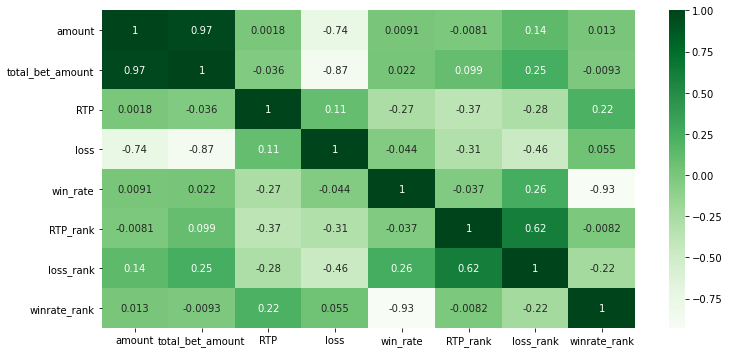

In [30]:
#returns a heatmap of pivot_rtp correlation
fig, ax = plt.subplots(1,figsize=(10,5))
fig.tight_layout()

sns.heatmap(pivot_rtp.corr(),annot=True,cmap='Greens');

In [31]:
#add NetPay column which is amount / total_bet_amount
df['NetPay'] = df['amount'] / df['total_bet_amount']

#mask df with total_bet_amount = 5000 and slotmachine_id = 'Cleopatra'
df_mask = df[(df['total_bet_amount']==5000) & (df['slotmachine_id']=="Cleopatra")]
df_mask.head()

,event_user,install_date,event_name,event_time,slotmachine_id,current_level,session_id,session_token,total_bet_amount,max_bet_amount,amount,spin_type,win_type,days,NetPay
1,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,72000,manual,mega,0 days,14.4
2,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,0,manual,none,0 days,0.0
3,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,1500,manual,fake,0 days,0.3
4,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:47:34,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,12500,0,manual,none,0 days,0.0
1073,000eaf2e7e1da405b4356f47365a6a81,2019-02-01 00:40:07,pcs.slotmachine.round_played,2019-02-01 00:42:06,Cleopatra,1,6c8e8cae9ad4e492e6cff52b103f5bf9,a14250c9cce2092bc3cc0419b1178100,5000,5000,72000,auto,mega,0 days,14.4


## Plot the distribution of NetPay for all spins with a bet amount of 5000 on the Cleopatra slot machine.

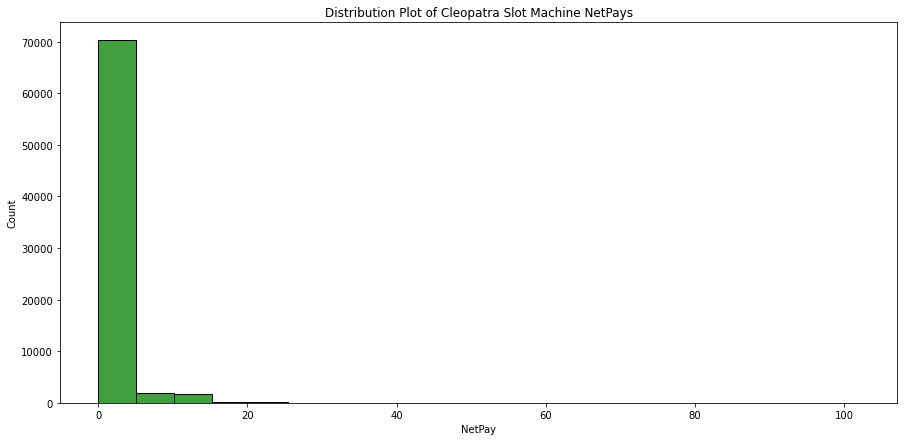

In [32]:
#returns a histogram of df_mask['NetPay']
fig, ax = plt.subplots(1, figsize=(15,7))
sns.histplot(df_mask['NetPay'], color ='green', bins=20)
plt.title('Distribution Plot of Cleopatra Slot Machine NetPays');

## What is the probability of hitting the various win_types in any given round?

In [33]:
#returns the probability of hitting the various win_types in any given round.
for i in range(len(df['win_type'].value_counts())):
    chance = (df['win_type'].value_counts()[i] / len(df))*100
    win = df['win_type'].value_counts().index[i]
    print("\nThe probability of hitting a {} in any given round is {}%.".format(win, round(chance,2)))


The probability of hitting a none in any given round is 56.29%.

The probability of hitting a fake in any given round is 27.35%.

The probability of hitting a regular in any given round is 11.83%.

The probability of hitting a big in any given round is 2.71%.

The probability of hitting a fivekind in any given round is 0.88%.

The probability of hitting a mega in any given round is 0.63%.

The probability of hitting a ultra in any given round is 0.3%.


In [34]:
#add future_bet_amount by shifting its period by -1, and bet_amount_change which is df['future_bet_amount'] - df['total_bet_amount']
df['future_bet_amount'] = df['total_bet_amount'].shift(periods=-1,fill_value=0)
df['bet_amount_change'] = df['future_bet_amount'] - df['total_bet_amount']
df.head()

,event_user,install_date,event_name,event_time,slotmachine_id,current_level,session_id,session_token,total_bet_amount,max_bet_amount,amount,spin_type,win_type,days,NetPay,future_bet_amount,bet_amount_change
0,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,2500,5000,750,manual,fake,0 days,0.3,5000,2500
1,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,72000,manual,mega,0 days,14.4,5000,0
2,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,0,manual,none,0 days,0.0,5000,0
3,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:46:34,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,1500,manual,fake,0 days,0.3,5000,0
4,0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22,pcs.slotmachine.round_played,2019-02-01 22:47:34,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,12500,0,manual,none,0 days,0.0,12500,7500


In [35]:
#returns a pivot table with bet_amount_change, upward and downward counts of bet for each session_token and event_user
pivot_bet_change = pd.pivot_table(df[df['bet_amount_change']!=0],index=['event_user','session_token'], values=['bet_amount_change'], aggfunc='count')
pivot_bet_change['up'] = df[df['bet_amount_change']>0].groupby(['event_user','session_token'])['bet_amount_change'].count()
pivot_bet_change['down'] = df[df['bet_amount_change']<0].groupby(['event_user','session_token'])['bet_amount_change'].count()
pivot_bet_change

bet_amount_change  \
event_user                       session_token                                         
0006eb6299ddd86c1f8f5d5c2c868a56 015b4943eb051aa5160853f6bb607bf3                  1   
                                 20ff4d4c290152b13f531bf390b93488                  2   
                                 2a223a391e34ebf3063be4eb0d538444                  2   
                                 7766e1e9b02ab5435c91ad5d1dcd8f7b                  3   
                                 a98b2e0961a22a4953c33c7ff8f359ac                  1   
...                                                                              ...   
ff6d908ce1e1e23eb077bbf187ea8621 d9857d3da2c8a2419ef9f84d4df245de                  2   
                                 fe80c563d492b63dd2457210b1a65f7a                  1   
ff6e2bfe18a818252d15613e914b561a 0edb83476ad8009131ec6471f1010311                  4   
                                 ba1f1f52a24123fd9b473ee3ab5def12                 12   
ffd256da322ee33d0d9d34ff7416a4b0 6c07b5296821004c5f29cd4522df229a                  1   

                                                                    up  down  
event_user                       session_token                                
0006eb6299ddd86c1f8f5d5c2c868a56 015b4943eb051aa5160853f6bb607bf3  NaN   1.0  
                                 20ff4d4c290152b13f531bf390b93488  2.0   NaN  
                                 2a223a391e34ebf3063be4eb0d538444  1.0   1.0  
                                 7766e1e9b02ab5435c91ad5d1dcd8f7b  2.0   1.0  
                                 a98b2e0961a22a4953c33c7ff8f359ac  NaN   1.0  
...                                                                ...   ...  
ff6d908ce1e1e23eb077bbf187ea8621 d9857d3da2c8a2419ef9f84d4df245de  2.0   NaN  
                                 fe80c563d492b63dd2457210b1a65f7a  1.0   NaN  
ff6e2bfe18a818252d15613e914b561a 0edb83476ad8009131ec6471f1010311  2.0   2.0  
                                 ba1f1f52a24123fd9b473ee3ab5def12  9.0   3.0  
ffd256da322ee33d0d9d34ff7416a4b0 6c07b5296821004c5f29cd4522df229a  NaN   1.0  

[6723 rows x 3 columns]

## What is the average number of times a player will change their bet size in a slot machine session?

In [36]:
#returns the average, min, and max number of times a player will change their bet size in a slot machine session.
pivot_bet_change_mean = np.mean(pivot_bet_change['bet_amount_change'].values)
pivot_bet_change_values = pivot_bet_change['bet_amount_change'].values

#returns the percentage of times the players tend to adjust their bets.
pivot_bet_changeup = (pivot_bet_change['up'].sum()/pivot_bet_change['bet_amount_change'].sum())*100
pivot_bet_changedown = (pivot_bet_change['down'].sum()/pivot_bet_change['bet_amount_change'].sum())*100

print("\nThe average number of times a player will change their bet size in a slot machine session is {:.0f} times.".format(pivot_bet_change_mean))
print("\nThe minimum number of times a player will change their bet size in a slot machine session is {} times, while its maximum is {} times.".format(pivot_bet_change_values.min(), pivot_bet_change_values.max()))
print("\nThe percentage of times the players tend to adjust their bet upwards is {:.2f}%, while players who tend to adjust their bet downwards is {:.2f}%.".format(pivot_bet_changeup,pivot_bet_changedown))


The average number of times a player will change their bet size in a slot machine session is 3 times.

The minimum number of times a player will change their bet size in a slot machine session is 1 times, while its maximum is 61 times.

The percentage of times the players tend to adjust their bet upwards is 61.68%, while players who tend to adjust their bet downwards is 38.32%.


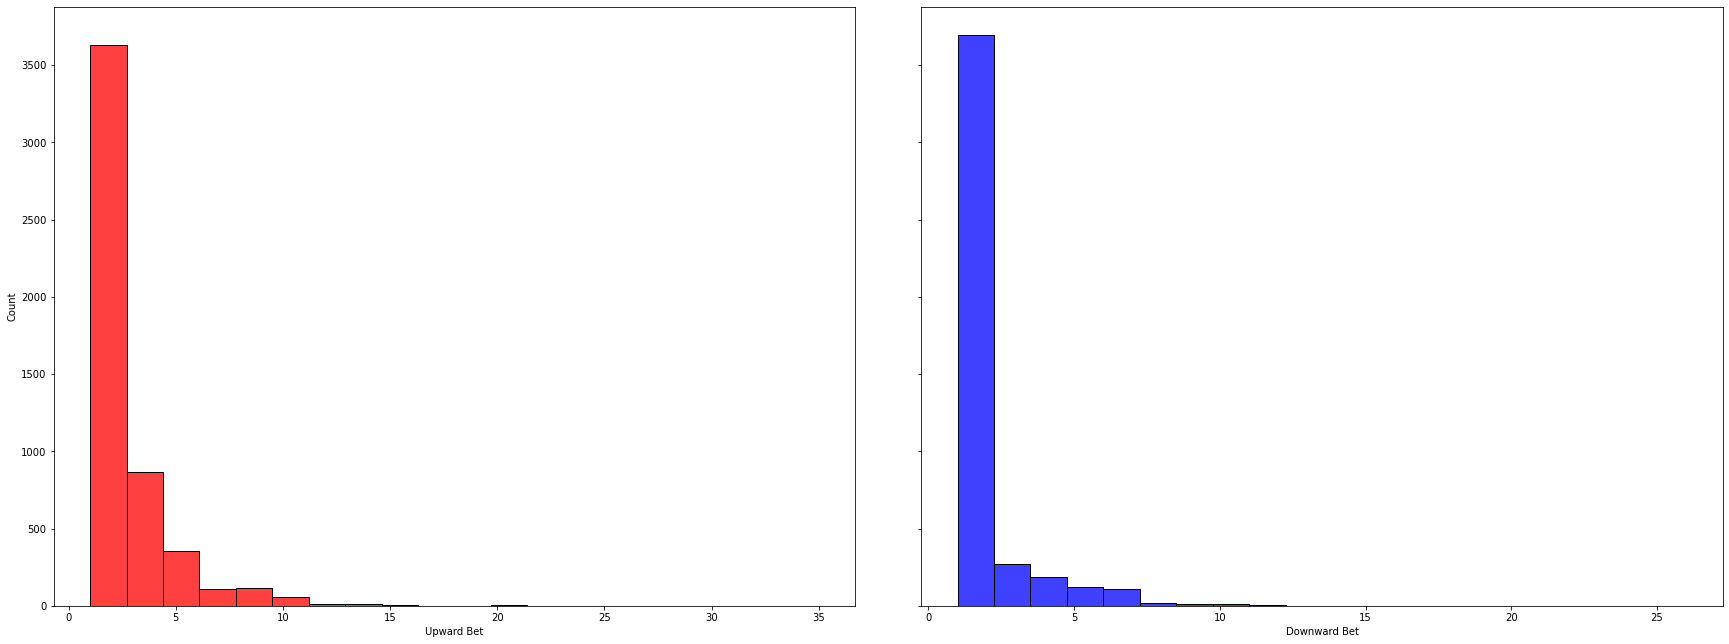

In [37]:
#returns a histogram on the count of upward and downward bets.
fig, ax = plt.subplots(1,2, figsize=(25,10),sharey=True)
fig.tight_layout(pad = 5.0)
sns.histplot(ax=ax[0],x=pivot_bet_change['up'], color ='red', bins=20)
ax[0].set_xlabel('Upward Bet')
sns.histplot(ax=ax[1],x=pivot_bet_change['down'], color ='blue', bins=20)
ax[1].set_xlabel('Downward Bet');

### Do players only tend to adjust their bet upwards?
Yes, players tend to mostly adjust their bets upwards than downwards.